# Opgave 6.1
Bestem Konditionstallet for de følgende funktioner og diskuter konsekvenser for beregninger med float:

a) $f(x) = \frac{1}{(1+x^2)}$

b) $f(x) = sin(x)$

c) $f(x,y) = xy$



## a)

Vi benytter os her af udregning for den relative fejl fra notesæt 11.
Vi ender her med at få at a= $\frac{2x^2}{1+x^2}$



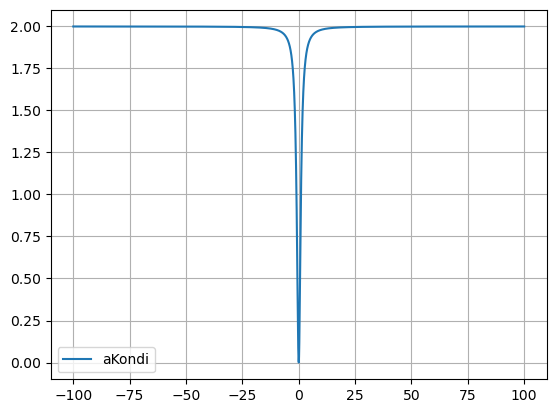

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Plot af a

# Function to plot funcs between 0-12
# Plot the functions
def plotFuncs(funcs,min=0,max=100,step = 200):
    x = np.linspace(min, max, step)
    fig, ax = plt.subplots() 
    for func in funcs:
        y = func(x)
        ax.plot(x, y, label=func.__name__)  
    ax.grid(True)
    ax.legend()  # Add legend to differentiate between functions
    
def aKondi(x):
    return (2*x**2)/(1+x**2)

plotFuncs([aKondi],min=-100,max=100,step=10000)

Det kan her ses at vi vil godtage denne, da den holder sig inden for 1-10. Det kan ses at den går mod 2 jo højere den absolutte værdi af x bliver.

For B har vi så i følge samme metode
$$
|x|\frac{|cos(x)|}{|sin(x)|}
$$
Hvis vi plotter denne får vi:

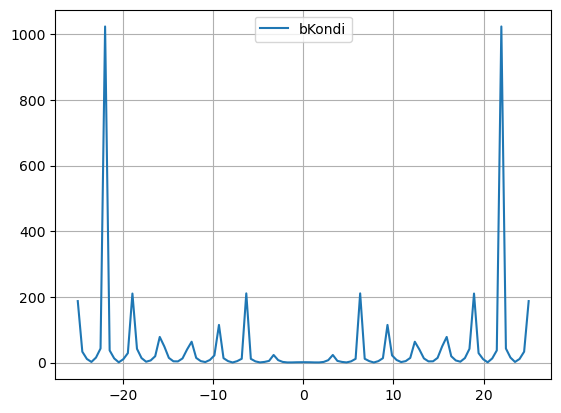

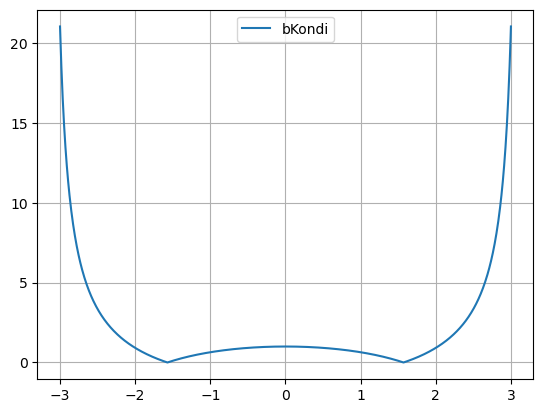

In [2]:
def bKondi(x):
    return (np.abs(x)*np.abs(np.cos(x)))/(np.abs(np.sin(x)))
    
plotFuncs([bKondi],min=-25,max=25,step = 100)
plotFuncs([bKondi],min=-3,max=3,step=1000)

Det kan her ses at B i Intervaller har et okay lavt konditionstal. Dog kan det ses at den har et meget dårlig konditionstal, inden for andre områder.

For C har vi en funktion af mere end en variabel. Derfor skal vi bruge forklaringen på side 5 i notesæt 11.

Her får vi:
$$
\frac{\sqrt{x^2+y^2}\sqrt{x^2+y^2}}{|yx|}
$$
Dette er det samme som
$$
\frac{x^2+y^2}{|yx|}
$$


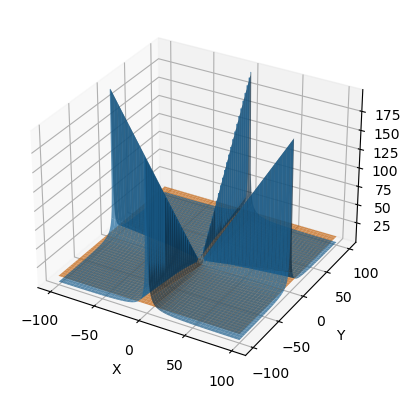

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Plot the functions in 3D using only numpy and matplotlib
def plotFuncs3D(funcs, min=-25, max=25, step=200):
    x = np.linspace(min, max, step)
    y = np.linspace(min, max, step)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for func in funcs:
        Z = func(X, Y)
        ax.plot_surface(X, Y, Z, label="", alpha=0.7)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

    
def cKondi(x, y):
    return (x**2 + y**2) / (np.abs(y * x))

def flat10(x,y):
    return ((x/x) * (y/y)) *10
            
plotFuncs3D([cKondi,flat10],min=-100,max=100)

Her kan det ses at konditionstallet er meget dårligt nå y eller x er tæt på 0. Den ser også ud til at være over 10 ellers.

# Opgave 6.2
Omskriv følgende udtryk til x+iy med x,y $\in \mathbb{R}$

a) (3+2i) + (-1 +i)

$$
\begin{align}
(3+(-1)+i(2 + 1))\\
2+3i\\
\end{align}
$$

b) (3+2i)(-1+i)
$$
\begin{align}
3\cdot -1 + 3\cdot i + 2i \cdot -1 + 2i\cdot i\\
-3+3i-2i+2i^2\\
-3+i-2\\
-5+i
\end{align}
$$

c) (3+2i)/(-1+i)

$$
\begin{align}
(3+2i)\frac{1}{-1+i}\\
(3+2i)\frac{-1-1i}{-1^2+1^2}\\
(3+2i)\frac{-1-1i}{2}\\
(3+2i)(\frac{-1}{2}-\frac{1i}{2})\\
(3+2i)(-0.5-\frac{1i}{2})\\
3*-0.5 + i(2-0.5)\\
-1.5+1.5i
\end{align}
$$


Løs de følgende ligningssytemet:

d) $(1+i)z = 2-i$

$$
\begin{align}
z=2-i-(1+i)\\
z = (2-i)-(1+i)\\
z = 2-1 - i(-1-1)\\
z = 1 - 2i\\
\end{align}
$$


e) 
$$
\begin{cases}
(1-i)a+ib-(1+i)c = 5\\
a-(2+i)b+ic= 2\\
ia + (1-i)b + (1-i)c = 0
\end{cases}
$$

In [4]:
e = np.array([[1-1j,1j,-(1+1j)],
             [1,-(2+1j),1j],
             [1j,(1-1j),(1-1j)]])

results = np.array([5,2,0])

solutions = np.linalg.solve(e,results)

print(solutions)

print(np.real(e@solutions))

[6.+2.j 3.+0.j 1.-2.j]
[5. 2. 0.]


# Opgave 6.3
Lad
$$
A = \begin{bmatrix} 
2 & 0\\
0 & 1
\end{bmatrix}
,
e_0 = \begin{bmatrix}
1\\
0
\end{bmatrix}
e_1 = \begin{bmatrix}
0\\
1
\end{bmatrix}
$$

a) vis at $Ae_0$ er vinkelret på $Ae_1$

b) Beregn vinklen mellem $v_0 = (1,1)$ og $v_1 = (1,-1)$ samt vinklen mellem $Av_0$ og $Av_1$

c) Sæt $w_0 = (c,s)$,$c^2 + s^2 = 1$ og $w_1 =(-s,c) $ Lav en plot af vinklen mellem $Aw_0$ og $A_w1$ når $w_0$ variere.Vis derefter at $Aw_0$ er vinkelret på $Aw_1$ kun hvis $w_0$ og $w_1$ er parallelle med $e_0$ og $e_1$ , i ubestemt rækkefølge.

Ae0 and Ae1 is ortogonal [[ True]]
Angle between v0 and v1 is: 90.0
Angle between Av0 and Av1 is: 53.13010235415599


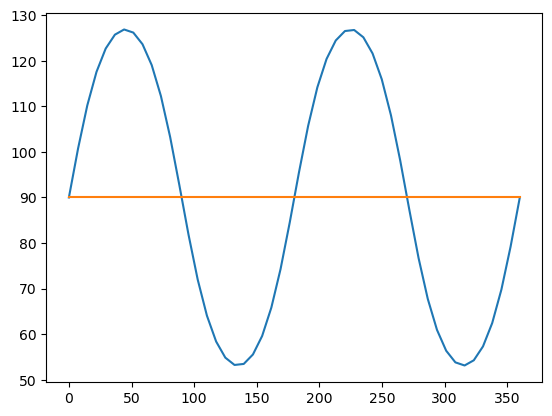

In [21]:
####################
# OPGAVE A         #
####################
A = np.array([[2,0],
              [0,1]])
e0 = np.array([[1],[0]])
e1 = np.array([[0],[1]])

Ae0 = A@e0
Ae1 = A@e1

#Defination 8.5
def cosAngle(u,v):
    prikprodukt = u.T @ v
    uLength = np.linalg.norm(u)
    vLength = np.linalg.norm(v)
    result = prikprodukt/(uLength*vLength)
    return result

print("Ae0 and Ae1 is ortogonal",cosAngle(Ae0,Ae1) == 0)


####################
# OPGAVE B         #
####################

v0 = np.array([1,1])
v1 = np.array([1,-1])

print("Angle between v0 and v1 is:",np.degrees(np.arccos(cosAngle(v0,v1))))

Av0 = A@v0
Av1 = A@v1

print("Angle between Av0 and Av1 is:",np.degrees(np.arccos(cosAngle(Av0,Av1))))

####################
# OPGAVE C         #
####################

v = np.array([])

def Aw0Aw1(x):
    c = np.cos(x)
    s = np.sin(x)

    w0 = np.array([c,s])[:,np.newaxis]
    w1 = np.array([-s,c])[:,np.newaxis]
    Aw0 = A@w0
    Aw1 = A@w1

    return cosAngle(Aw0,Aw1)[0]

x = np.array([])           
for i in np.linspace(0,2*np.pi):
    tmp = Aw0Aw1(i);
    v = np.hstack((v,tmp))
    x = np.hstack((x,i))

fig, ax = plt.subplots() 
def zeros(x):
    return x*0+90

ax.plot(np.degrees(x),np.degrees(np.arccos(v)),np.degrees(x),zeros(x))

# Opgave 6.4

Lad V være vektorrummet, som består af som består af alle differentiable funktioner $f[-1,1] \rightarrow \mathbb{R}$ hvilke af de følgende er underum af V?

a) ${f \in V|f(0)=0}$

b) ${f \in V|f(1)=0}$

c) ${f \in V|f(-1)=1}$

d) ${f \in V|f'(0)=0}$


Benytter os af defination 12.12
## a

 a) g(x)=0
 b) g(x),h(x) $\in W$ medføre g(x)+h(x)$\in W$
     g(0)+h(0) = 0
  
 c) g $\in W$  sg(0) = 0
 
## b

a) g(x) = 0
b) g,h $\in W$ medføre g(1)+h(1) = 0 + 0 = 0
c) g $\in W$ sg = 0 

## c

a) g(x) = 1

b) g,h $\in W$ medføre g(-1)+h(-1) = 2, Derved ligger den ikke i rummet

## d

a) g(x) = konstant medføre at g'(x) = 0

b) g,h $\in W$ medføre g'(0) + h'(0) = 0 - hvis begge er konstanter

c) g $\in W$ sg medføre sg'(0) = 0

# Opgave 6.5

a) Hvis $A\in\mathbb{R}^{mxn}$ er en diagonal matrix med positive indgange, bestem en singulærværdikomponering (SVD) for A

b)Hvis  $A\in\mathbb{R}^{mxn}$ er en vilkårlig diogonal matrix, bestem en SVD for A

c) givet en vilkårlig  $A\in\mathbb{R}^{mxn}$ og $A=U\Sigma V^T$ en SVD for A, bestem en SVD for $A^T$

SVD for AT = $(U\Sigma V^T)^T$ ender med at bliver $V\Sigma U^T $,  da Sigma er en diogonal matrice og Sigma er en kvadratisk matrice

d) Hvis  $A\in\mathbb{R}^{nxn}$ er en ortogonal matrix bestem SVD for A

e) Hvis  $A\in\mathbb{R}^{nxn}$ er en invertibel matrix hvad kan siges om singulærværdien for A?
$A^{⁻1} SVD = (U\Sigma V^T)^{-1}$ Da V er en ortogonal matrice pr sætning 10.2 får vi: $V\Sigma^{-1}U^T$

f) For en vilkårlig matrix A, Hvor meget frihed er der i valg af SVD for A?